In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data

,date,city,co,no2,so2,o3,pm2.5,pm10,aqi
0,2023-01-01 00:00:00+00:00,Brasilia,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,2023-01-01 01:00:00+00:00,Brasilia,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,2023-01-01 02:00:00+00:00,Brasilia,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,2023-01-01 03:00:00+00:00,Brasilia,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,2023-01-01 04:00:00+00:00,Brasilia,246.0,19.35,1.25,32.0,6.8,9.7,19.324999
...,...,...,...,...,...,...,...,...,...
52555,2023-12-31 19:00:00+00:00,Sydney,74.0,8.30,3.50,25.0,11.0,20.0,25.341667
52556,2023-12-31 20:00:00+00:00,Sydney,75.0,8.20,3.90,25.0,12.0,21.9,25.200003
52557,2023-12-31 21:00:00+00:00,Sydney,76.0,7.90,4.20,26.0,14.5,26.7,25.133339
52558,2023-12-31 22:00:00+00:00,Sydney,77.0,7.40,4.40,28.0,13.5,24.7,25.116669


In [7]:
# Transformei o titulo das colunas em minusculo
data.columns = data.columns.str.lower()

array([[<Axes: title={'center': 'co'}>, <Axes: title={'center': 'no2'}>,
        <Axes: title={'center': 'so2'}>],
       [<Axes: title={'center': 'o3'}>,
        <Axes: title={'center': 'pm2.5'}>,
        <Axes: title={'center': 'pm10'}>],
       [<Axes: title={'center': 'aqi'}>, <Axes: >, <Axes: >]],
      dtype=object)

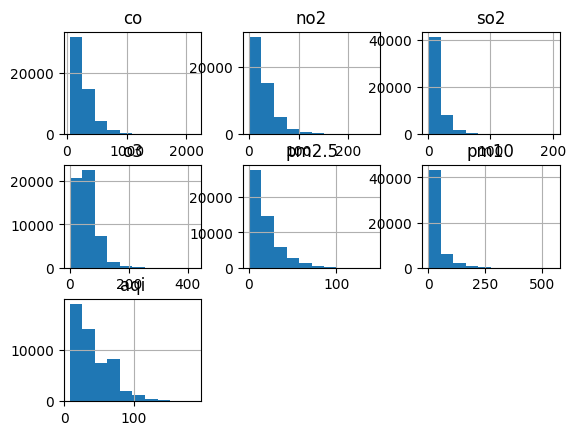

In [10]:
data.hist()

In [13]:
data_num = data.select_dtypes(include=['float64', 'int64'])
data_num

,co,no2,so2,o3,pm2.5,pm10,aqi
0,292.0,30.15,1.10,23.0,11.1,15.8,21.158330
1,291.0,28.95,1.15,24.0,12.4,17.7,20.825000
2,289.0,27.25,1.25,25.0,13.0,18.5,20.474998
3,275.0,23.70,1.30,28.0,9.2,13.1,20.074999
4,246.0,19.35,1.25,32.0,6.8,9.7,19.324999
...,...,...,...,...,...,...,...
52555,74.0,8.30,3.50,25.0,11.0,20.0,25.341667
52556,75.0,8.20,3.90,25.0,12.0,21.9,25.200003
52557,76.0,7.90,4.20,26.0,14.5,26.7,25.133339
52558,77.0,7.40,4.40,28.0,13.5,24.7,25.116669


In [21]:
# Apliquei o normalizador Quantile Transform com saída normal
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
qt.fit(data_num)

QuantileTransformer(output_distribution='normal')

In [22]:
# Criei um dataframe normalizado a partir do dataframe original
data_norm = pd.DataFrame(qt.transform(data_num), columns=data_num.columns)

array([[<Axes: title={'center': 'co'}>, <Axes: title={'center': 'no2'}>,
        <Axes: title={'center': 'so2'}>],
       [<Axes: title={'center': 'o3'}>,
        <Axes: title={'center': 'pm2.5'}>,
        <Axes: title={'center': 'pm10'}>],
       [<Axes: title={'center': 'aqi'}>, <Axes: >, <Axes: >]],
      dtype=object)

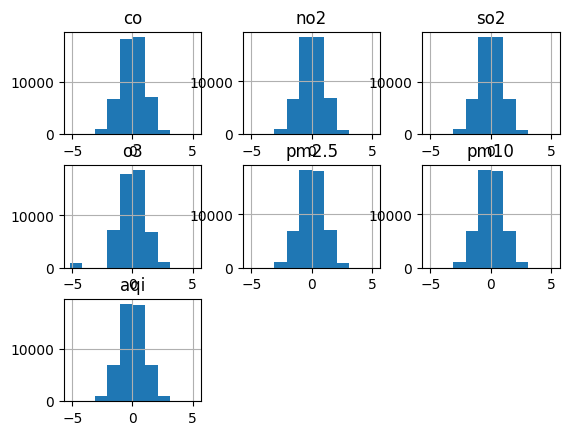

In [24]:
data_norm.hist()

In [28]:
# Mergi as colunas do data ao data_norm que não existem
data = data.drop(data_num.columns, axis=1)

In [29]:
data

,date,city
0,2023-01-01 00:00:00+00:00,Brasilia
1,2023-01-01 01:00:00+00:00,Brasilia
2,2023-01-01 02:00:00+00:00,Brasilia
3,2023-01-01 03:00:00+00:00,Brasilia
4,2023-01-01 04:00:00+00:00,Brasilia
...,...,...
52555,2023-12-31 19:00:00+00:00,Sydney
52556,2023-12-31 20:00:00+00:00,Sydney
52557,2023-12-31 21:00:00+00:00,Sydney
52558,2023-12-31 22:00:00+00:00,Sydney


In [30]:
# Mergi data com data_norm a partir do index
data = pd.concat([data, data_norm], axis=1)

In [31]:
data

,date,city,co,no2,so2,o3,pm2.5,pm10,aqi
0,2023-01-01 00:00:00+00:00,Brasilia,0.482248,0.369558,-1.588771,-0.884593,-0.189310,-0.287442,-0.841451
1,2023-01-01 01:00:00+00:00,Brasilia,0.476619,0.321611,-1.540631,-0.848075,-0.077862,-0.167640,-0.865581
2,2023-01-01 02:00:00+00:00,Brasilia,0.464007,0.243255,-1.449682,-0.816150,-0.033880,-0.123259,-0.915668
3,2023-01-01 03:00:00+00:00,Brasilia,0.384375,0.077862,-1.401177,-0.723343,-0.392492,-0.478025,-0.967265
4,2023-01-01 04:00:00+00:00,Brasilia,0.188033,-0.135911,-1.449682,-0.596935,-0.741388,-0.833781,-1.059299
...,...,...,...,...,...,...,...,...,...
52555,2023-12-31 19:00:00+00:00,Sydney,-2.241016,-0.945616,-0.365531,-0.816150,-0.198258,-0.050204,-0.412918
52556,2023-12-31 20:00:00+00:00,Sydney,-2.196894,-0.955471,-0.271787,-0.816150,-0.110627,0.045180,-0.419730
52557,2023-12-31 21:00:00+00:00,Sydney,-2.169694,-0.987652,-0.218773,-0.786745,0.069056,0.234219,-0.435724
52558,2023-12-31 22:00:00+00:00,Sydney,-2.144011,-1.046576,-0.182928,-0.723343,0.006273,0.160010,-0.436369


In [32]:
# Extraí os dados em csv
data.to_csv('data.csv', index=False)